# Cross Validation dalam Machine Learning

## Pengantar
Cross Validation adalah teknik penting dalam machine learning untuk:
1. Mengevaluasi performa model dengan lebih reliable
2. Mendeteksi overfitting dan underfitting
3. Memilih hyperparameter model yang optimal
4. Memaksimalkan penggunaan data yang terbatas

## Outline
1. Konsep Dasar Cross Validation
2. Jenis-jenis Cross Validation
3. Implementasi dengan Scikit-learn
4. Best Practices dan Tips
5. Studi Kasus

Mari kita mulai dengan import library yang diperlukan.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    KFold,
    StratifiedKFold,
    LeaveOneOut,
    TimeSeriesSplit
)
from sklearn.datasets import load_iris, load_diabetes
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

# Set random seed
np.random.seed(42)

# 1. Konsep Dasar Cross Validation

## Mengapa Perlu Cross Validation?

1. **Masalah dengan Split Data Sederhana**
   - Hasil bisa bergantung pada split yang kebetulan
   - Tidak memanfaatkan data secara maksimal
   - Bisa menghasilkan estimasi performa yang bias

2. **Keuntungan Cross Validation**
   - Evaluasi model lebih reliable
   - Memanfaatkan semua data untuk training dan testing
   - Mengurangi variance dalam estimasi performa
   - Mendeteksi overfitting dengan lebih baik

## Prinsip Dasar K-Fold Cross Validation
1. Data dibagi menjadi k bagian (fold) yang sama besar
2. Setiap fold akan menjadi test set sekali
3. Fold lainnya menjadi training set
4. Model dilatih dan dievaluasi k kali
5. Hasil akhir adalah rata-rata dari k evaluasi

Mari kita visualisasikan konsep ini.

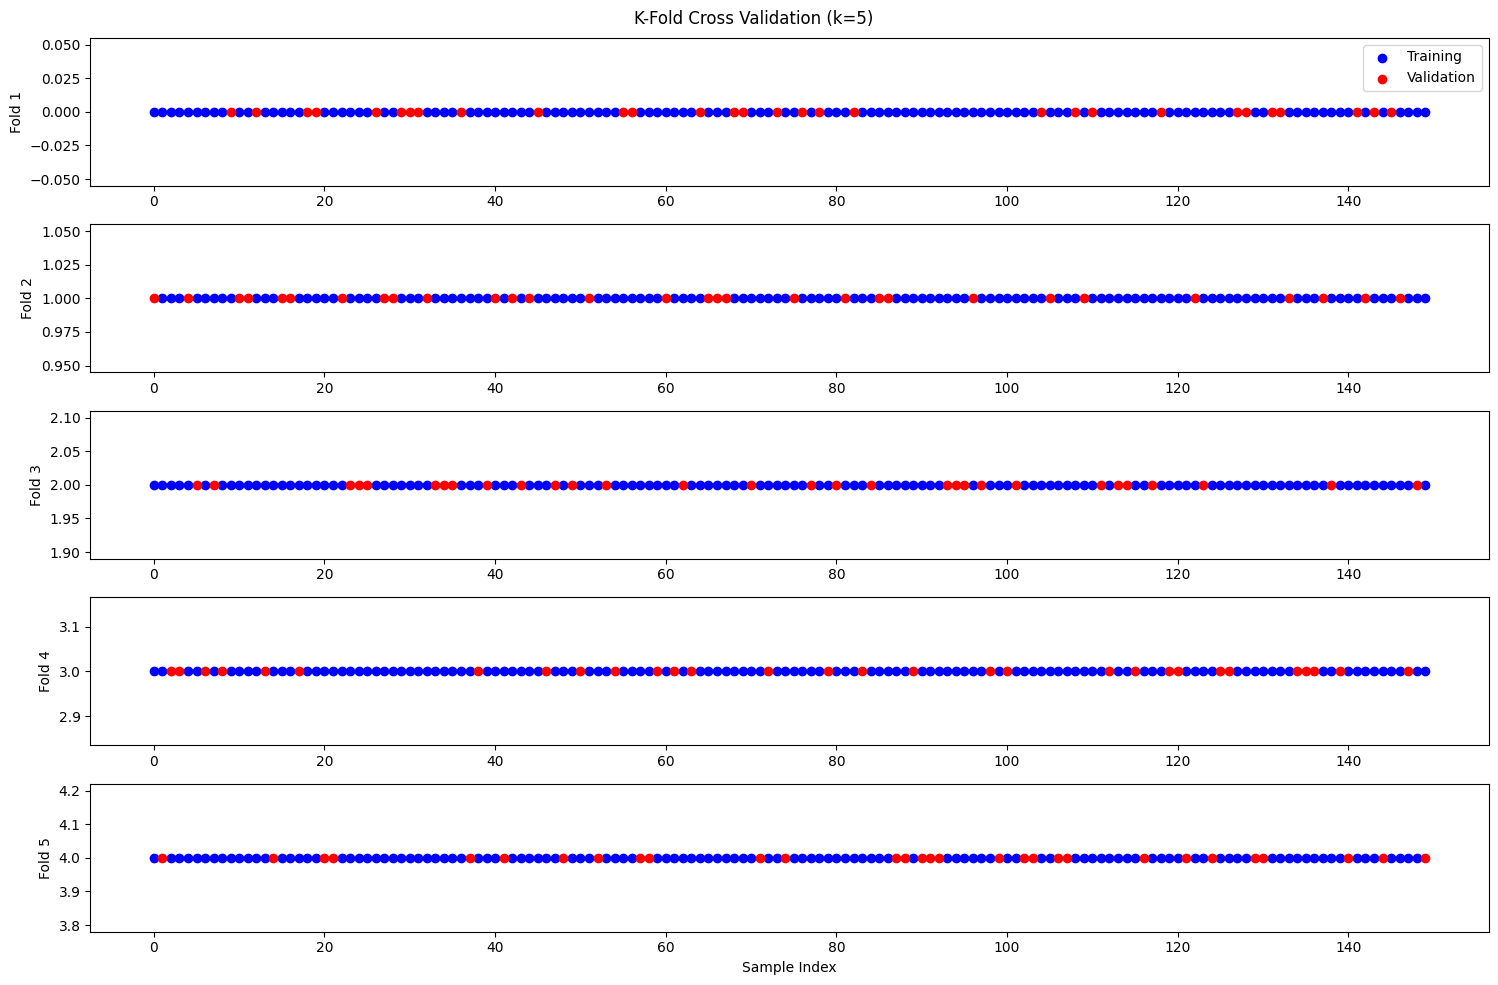

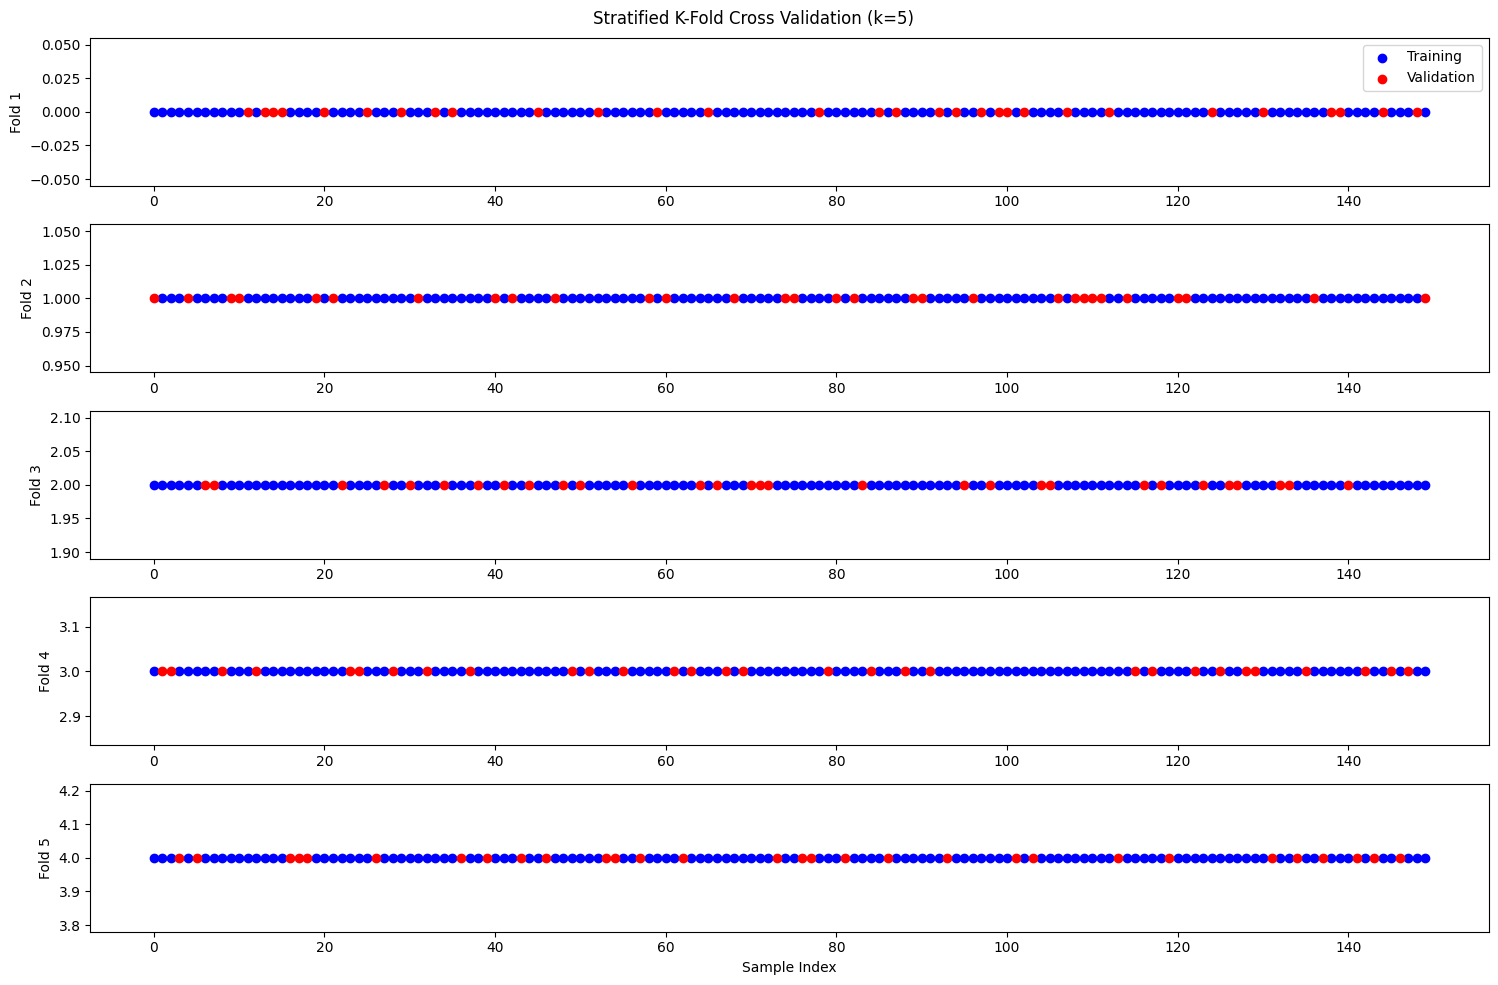

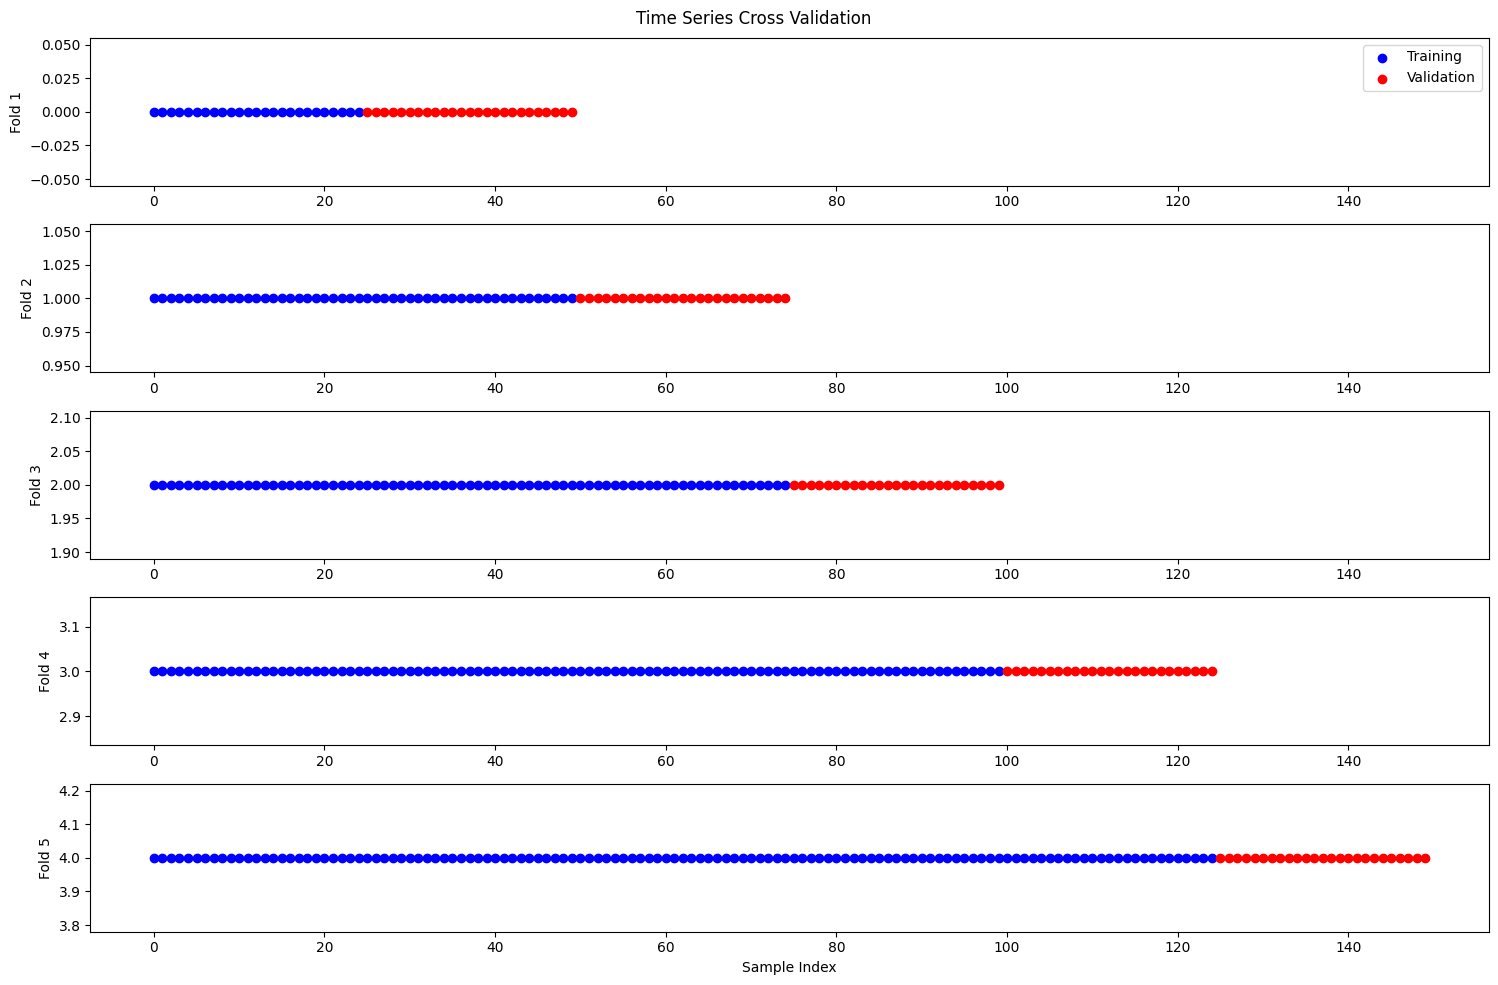

In [83]:
# Fungsi untuk visualisasi K-Fold Cross Validation
def plot_cv_splits(cv, X, y, title):
    fig, axs = plt.subplots(cv.n_splits, 1, figsize=(15, cv.n_splits * 2))
    for idx, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        axs[idx].scatter(range(len(y)), [idx] * len(y), c='white', alpha=0.5)
        axs[idx].scatter(train_idx, [idx] * len(train_idx), c='blue', label='Training')
        axs[idx].scatter(val_idx, [idx] * len(val_idx), c='red', label='Validation')
        axs[idx].set_ylabel(f'Fold {idx+1}')
        if idx == 0:
            axs[idx].legend()
    
    plt.suptitle(title)
    plt.xlabel('Sample Index')
    plt.tight_layout()
    plt.show()

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Visualisasi berbagai jenis CV
# 1. K-Fold standard
kf = KFold(n_splits=5, shuffle=True, random_state=42)
plot_cv_splits(kf, X, y, 'K-Fold Cross Validation (k=5)')

# 2. Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_cv_splits(skf, X, y, 'Stratified K-Fold Cross Validation (k=5)')

# 3. Time Series Split
tscv = TimeSeriesSplit(n_splits=5)
plot_cv_splits(tscv, X, y, 'Time Series Cross Validation')

# 2. Jenis-jenis Cross Validation

## 1. K-Fold Cross Validation
- Data dibagi menjadi k bagian sama besar
- Cocok untuk dataset ukuran menengah-besar
- Sederhana dan mudah diimplementasikan
- Bisa menghasilkan hasil yang tidak stabil untuk k kecil

## 2. Stratified K-Fold
- Mempertahankan proporsi kelas dalam setiap fold
- Sangat penting untuk dataset tidak seimbang
- Lebih reliable untuk klasifikasi
- Tidak bisa digunakan untuk regresi

## 3. Leave-One-Out (LOO)
- Kasus khusus k-fold dimana k = jumlah sampel
- Computationally expensive
- Cocok untuk dataset kecil
- Memberikan estimasi unbiased tapi high variance

## 4. Time Series Cross Validation
- Khusus untuk data time series
- Mempertahankan urutan temporal
- Menghindari data leakage
- Fold berikutnya selalu setelah fold sebelumnya

Mari kita implementasikan dan bandingkan berbagai jenis CV ini.

Hasil Cross Validation untuk Klasifikasi (Iris Dataset):
--------------------------------------------------


/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/dihak/.local/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dihak/.local/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dihak/.local/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py", line 1301, in f

KFold (k=5):
  Mean Accuracy: 0.9733 (+/- 0.0499)
KFold (k=10):
  Mean Accuracy: 0.9733 (+/- 0.0884)
Stratified KFold:
  Mean Accuracy: 0.9667 (+/- 0.0596)
Leave-One-Out:
  Mean Accuracy: 0.9667 (+/- 0.3590)
TimeSeriesSplit:
  Mean Accuracy: nan (+/- nan)

Hasil Cross Validation untuk Regresi (Diabetes Dataset):
--------------------------------------------------


KFold (k=5):
  Mean RMSE: 54.8489 (+/- 5.2822)
KFold (k=10):
  Mean RMSE: 54.8606 (+/- 7.4752)
Stratified KFold:
  Mean RMSE: 55.0980 (+/- 8.4025)
Leave-One-Out:
  Mean RMSE: 44.3557 (+/- 64.3218)
TimeSeriesSplit:
  Mean RMSE: 56.8678 (+/- 8.7494)


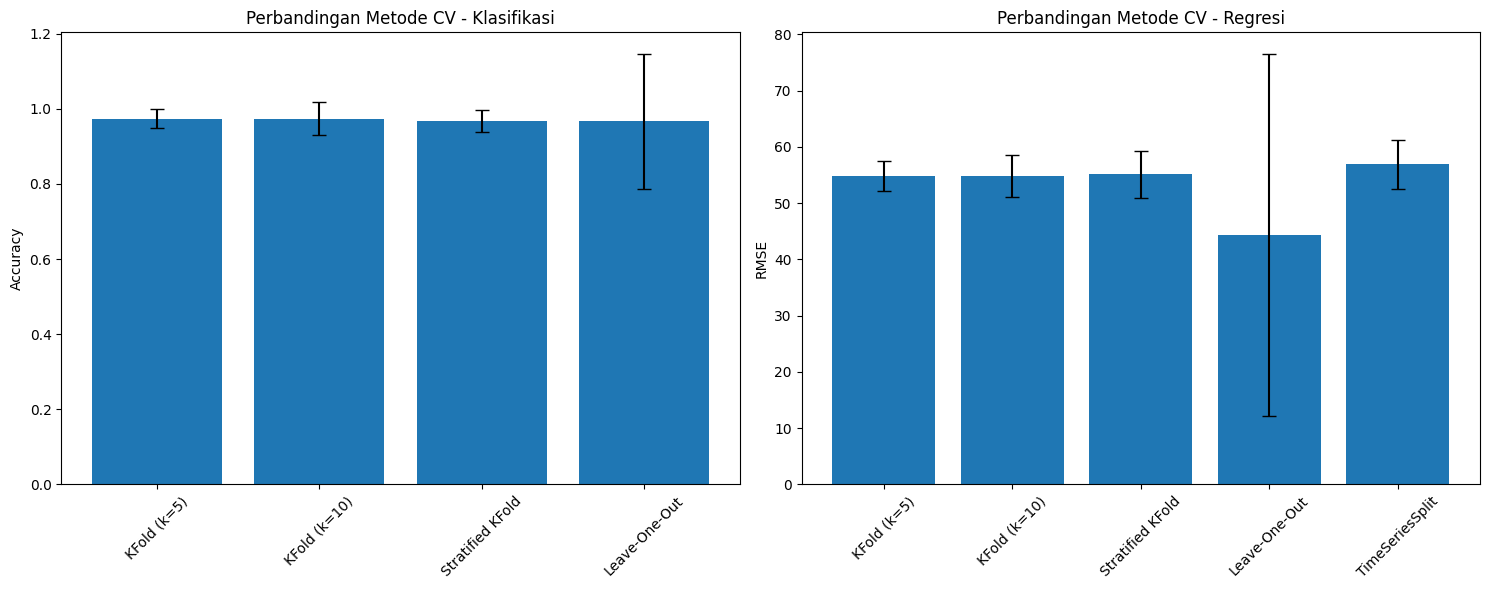

In [84]:
# Perbandingan berbagai jenis Cross Validation
def compare_cv_methods(X, y, is_classification=True):
    # Inisialisasi model
    if is_classification:
        model = LogisticRegression(random_state=42)
        scoring = 'accuracy'
    else:
        model = LinearRegression()
        scoring = 'neg_mean_squared_error'
    
    # Berbagai metode CV
    cv_methods = {
        'KFold (k=5)': KFold(n_splits=5, shuffle=True, random_state=42),
        'KFold (k=10)': KFold(n_splits=10, shuffle=True, random_state=42),
        'Stratified KFold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        'Leave-One-Out': LeaveOneOut(),
        'TimeSeriesSplit': TimeSeriesSplit(n_splits=5)
    }
    
    # Evaluasi setiap metode
    results = {}
    for name, cv in cv_methods.items():
        try:
            scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
            if scoring == 'neg_mean_squared_error':
                scores = np.sqrt(-scores)  # Convert to RMSE
            results[name] = {
                'mean': scores.mean(),
                'std': scores.std()
            }
        except Exception as e:
            print(f"Error with {name}: {str(e)}")
    
    return results

# Evaluasi untuk klasifikasi (Iris dataset)
print("Hasil Cross Validation untuk Klasifikasi (Iris Dataset):")
print("-" * 50)
results_clf = compare_cv_methods(X, y, is_classification=True)
for method, scores in results_clf.items():
    print(f"{method}:")
    print(f"  Mean Accuracy: {scores['mean']:.4f} (+/- {2*scores['std']:.4f})")

# Evaluasi untuk regresi (Diabetes dataset)
diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target

print("\nHasil Cross Validation untuk Regresi (Diabetes Dataset):")
print("-" * 50)
results_reg = compare_cv_methods(X_reg, y_reg, is_classification=False)
for method, scores in results_reg.items():
    print(f"{method}:")
    print(f"  Mean RMSE: {scores['mean']:.4f} (+/- {2*scores['std']:.4f})")

# Visualisasi perbandingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot untuk klasifikasi
methods = list(results_clf.keys())
means = [scores['mean'] for scores in results_clf.values()]
stds = [scores['std'] for scores in results_clf.values()]

ax1.bar(methods, means, yerr=stds, capsize=5)
ax1.set_title('Perbandingan Metode CV - Klasifikasi')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)

# Plot untuk regresi
methods = list(results_reg.keys())
means = [scores['mean'] for scores in results_reg.values()]
stds = [scores['std'] for scores in results_reg.values()]

ax2.bar(methods, means, yerr=stds, capsize=5)
ax2.set_title('Perbandingan Metode CV - Regresi')
ax2.set_ylabel('RMSE')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Best Practices dalam Cross Validation

## 1. Pemilihan Nilai k
- k = 5 atau 10 adalah pilihan umum
- k lebih besar = bias lebih kecil, variance lebih besar
- k lebih kecil = komputasi lebih cepat, estimasi kurang stabil
- Pertimbangkan ukuran dataset dan computational cost

## 2. Stratifikasi
- Penting untuk klasifikasi dengan kelas tidak seimbang
- Memastikan proporsi kelas konsisten di semua fold
- Mengurangi bias dalam estimasi performa
- Gunakan StratifiedKFold untuk klasifikasi

## 3. Shuffling
- Selalu shuffle data sebelum CV (kecuali untuk time series)
- Set random_state untuk reproducibility
- Hindari bias karena urutan data

## 4. Data Preprocessing
- Lakukan preprocessing di dalam setiap fold
- Hindari data leakage
- Gunakan Pipeline untuk automasi

Mari kita implementasikan best practices ini dalam contoh.

Hasil Cross Validation dengan Pipeline (Klasifikasi):
--------------------------------------------------
accuracy:
  Mean: 0.9533
  Std: 0.0452
precision_macro:
  Mean: 0.9549
  Std: 0.0443
recall_macro:
  Mean: 0.9533
  Std: 0.0452
f1_macro:
  Mean: 0.9532
  Std: 0.0453


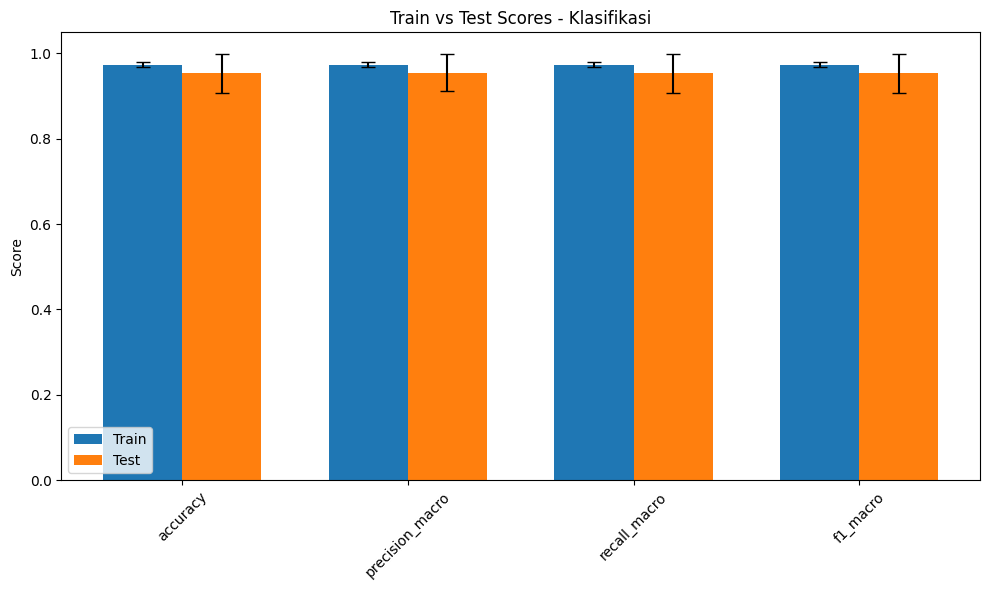

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Implementasi best practices dengan Pipeline
def cv_with_pipeline(X, y, model, cv, is_classification=True):
    # Buat pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Metrics untuk evaluasi
    if is_classification:
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    else:
        scoring = ['neg_mean_squared_error', 'r2']
    
    # Cross validation dengan multiple metrics
    scores = cross_validate(
        pipeline, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=True
    )
    
    return scores

# Contoh dengan dataset Iris
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
scores_clf = cv_with_pipeline(X, y, model, cv, is_classification=True)

# Print hasil
print("Hasil Cross Validation dengan Pipeline (Klasifikasi):")
print("-" * 50)
for metric in scores_clf.keys():
    if metric.startswith('test_'):
        print(f"{metric[5:]}:")
        print(f"  Mean: {scores_clf[metric].mean():.4f}")
        print(f"  Std: {scores_clf[metric].std():.4f}")

# Visualisasi train vs test scores
def plot_train_test_scores(scores, title):
    metrics = [key[5:] for key in scores.keys() if key.startswith('test_')]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(metrics))
    width = 0.35
    
    train_means = [scores[f'train_{m}'].mean() for m in metrics]
    test_means = [scores[f'test_{m}'].mean() for m in metrics]
    train_stds = [scores[f'train_{m}'].std() for m in metrics]
    test_stds = [scores[f'test_{m}'].std() for m in metrics]
    
    ax.bar(x - width/2, train_means, width, label='Train',
           yerr=train_stds, capsize=5)
    ax.bar(x + width/2, test_means, width, label='Test',
           yerr=test_stds, capsize=5)
    
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

plot_train_test_scores(scores_clf, 'Train vs Test Scores - Klasifikasi')

# 4. Kasus Khusus dan Pertimbangan

## 1. Time Series Data
- Gunakan TimeSeriesSplit
- Pertahankan urutan temporal
- Hindari look-ahead bias
- Pertimbangkan seasonality

## 2. Imbalanced Data
- Gunakan StratifiedKFold
- Monitor metrics selain accuracy
- Pertimbangkan resampling dalam setiap fold
- Gunakan class weights

## 3. Small Datasets
- Leave-One-Out bisa jadi pilihan
- Pertimbangkan repeated k-fold
- Monitor variance scores
- Gunakan bootstrap sampling

## 4. Large Datasets
- Gunakan k yang lebih kecil
- Pertimbangkan stratified shuffle split
- Balance antara computational cost dan reliability
- Gunakan parallel processing

Mari kita lihat contoh implementasi untuk kasus-kasus khusus ini.

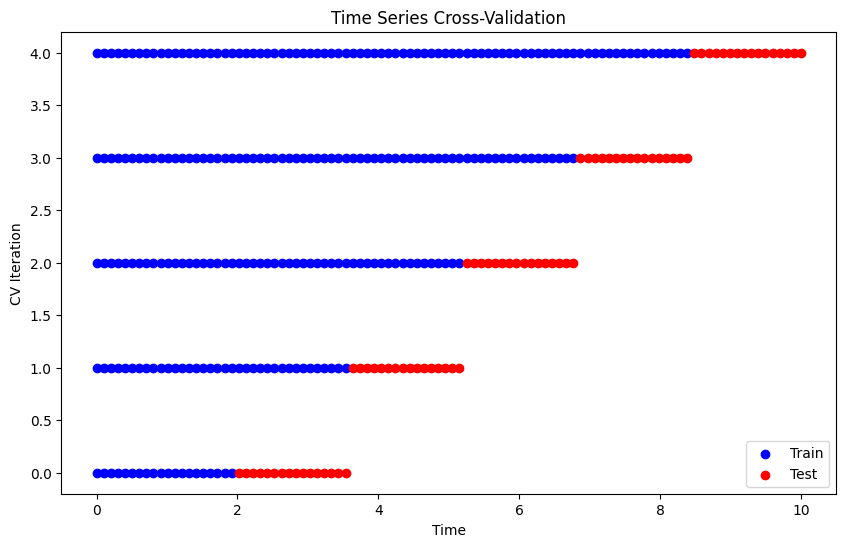

Distribusi Kelas Original:


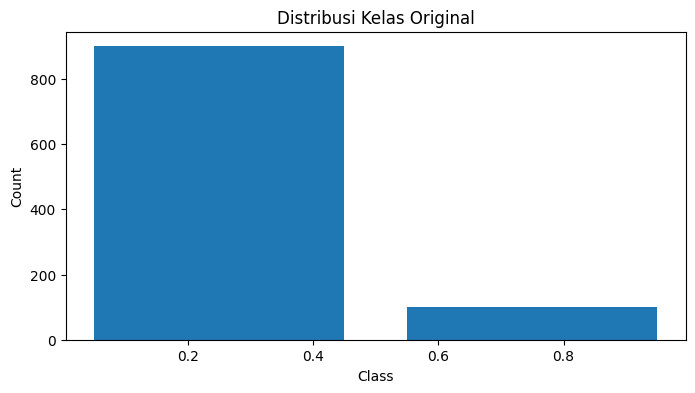


Distribusi Kelas Setelah Resampling (Fold):


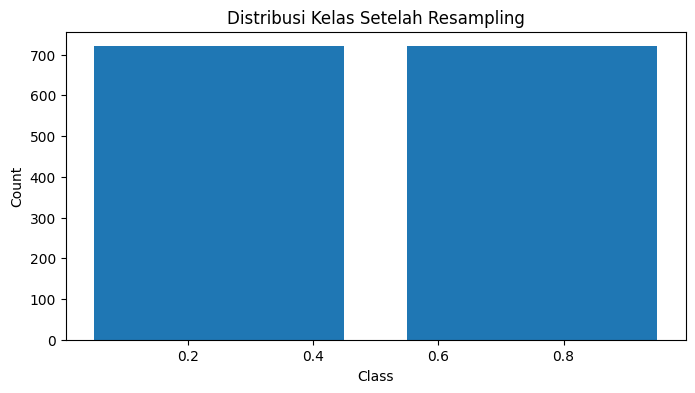

In [86]:
# 1. Contoh Time Series CV
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Generate time series data
n_samples = 100
time = np.linspace(0, 10, n_samples)
X_time = np.column_stack([time, np.sin(time)])
y_time = np.cos(time)

# Time Series CV
tscv = TimeSeriesSplit(n_splits=5)
fig, ax = plt.subplots(figsize=(10, 6))

for i, (train_idx, test_idx) in enumerate(tscv.split(X_time)):
    ax.scatter(time[train_idx], [i] * len(train_idx), 
              c='blue', label='Train' if i == 0 else "")
    ax.scatter(time[test_idx], [i] * len(test_idx), 
              c='red', label='Test' if i == 0 else "")

ax.set_title('Time Series Cross-Validation')
ax.set_xlabel('Time')
ax.set_ylabel('CV Iteration')
ax.legend()
plt.show()

# 2. Contoh Imbalanced Data CV
from sklearn.utils import resample

# Create imbalanced dataset
n_samples = 1000
n_class_1 = 900
n_class_2 = 100

X_imb = np.random.randn(n_samples, 2)
y_imb = np.zeros(n_samples)
y_imb[:n_class_2] = 1

# Plot class distribution before and after resampling
def plot_class_dist(y, title):
    plt.figure(figsize=(8, 4))
    plt.hist(y, bins=2, rwidth=0.8)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

print("Distribusi Kelas Original:")
plot_class_dist(y_imb, 'Distribusi Kelas Original')

# Resampling dalam cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, _ in cv.split(X_imb, y_imb):
    X_train, y_train = X_imb[train_idx], y_imb[train_idx]
    
    # Resample minority class
    X_min = X_train[y_train == 1]
    y_min = y_train[y_train == 1]
    X_min_resampled, y_min_resampled = resample(
        X_min, y_min,
        n_samples=len(y_train[y_train == 0]),
        random_state=42
    )
    
    # Combine with majority class
    X_train_balanced = np.vstack([X_train[y_train == 0], X_min_resampled])
    y_train_balanced = np.hstack([y_train[y_train == 0], y_min_resampled])
    
    print("\nDistribusi Kelas Setelah Resampling (Fold):")
    plot_class_dist(y_train_balanced, 'Distribusi Kelas Setelah Resampling')
    break  # Show only first fold

# Kesimpulan dan Tips

## Key Points
1. Cross validation sangat penting untuk:
   - Evaluasi model yang reliable
   - Deteksi overfitting
   - Pemilihan hyperparameter
   - Maksimalisasi penggunaan data

2. Pilihan metode CV tergantung pada:
   - Ukuran dataset
   - Tipe data (klasifikasi/regresi)
   - Karakteristik data (time series, imbalanced)
   - Computational resources

3. Best practices:
   - Selalu gunakan stratifikasi untuk klasifikasi
   - Preprocessing dalam setiap fold
   - Set random seed untuk reproducibility
   - Monitor both bias dan variance

## Tips Implementasi
1. Gunakan Pipeline untuk automasi workflow
2. Implementasikan parallel processing untuk dataset besar
3. Monitor multiple metrics
4. Pertimbangkan trade-off antara bias dan variance

## Common Pitfalls
1. Data leakage dalam preprocessing
2. Overfitting pada validation set
3. Mengabaikan karakteristik khusus data
4. Terlalu fokus pada satu metrik

## Next Steps
1. Eksperimen dengan berbagai metode CV
2. Implementasikan pada dataset real
3. Bandingkan performa berbagai model
4. Optimalkan hyperparameter dengan CV